In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importamos los datos "Accidentes de Transito en la Carretera de los años 2020 y 2021"
datos=pd.read_csv("ATEC20_21.csv")
datos

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222,20200101,5:40,LIMA,PE-1S,24.0,DESPISTE,0.0,0.0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74.0,DESPISTE,0.0,0.0
2,20211222,20200101,7:45,PASCO,PE-3N,103.0,DESPISTE,0.0,1.0
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111.0,DESPISTE,0.0,2.0
4,20211222,20200101,18:40,LIMA,PE-1N,174.0,DESPISTE,0.0,5.0
...,...,...,...,...,...,...,...,...,...
8150,20211222,20210930,1:30,ANCASH,PE-1N,348.0,CHOQUE,0.0,0.0
8151,20211222,20210930,4:00,MADRE DE DIOS,PE-30C,417.0,CHOQUE,0.0,0.0
8152,20211222,20210930,15:10,LA LIBERTAD,PE-1N,627.0,CHOQUE,0.0,2.0
8153,20211222,20210930,2:50,LAMBAYEQUE,PE-1N,758.0,DESPISTE,0.0,0.0


In [ ]:
#Dectectamos los datos nulos de la base de datos 
datos.isnull()
datos.notnull()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
8150,True,True,True,True,True,True,True,True,True
8151,True,True,True,True,True,True,True,True,True
8152,True,True,True,True,True,True,True,True,True
8153,True,True,True,True,True,True,True,True,True


In [ ]:
#Eliminamos las filas que contienen los datos nulos
datos.dropna()
print(datos)

#Mostrando las dimensiones de la tabla 
print('Las dimensiones de la tabla ahora son: ', datos.shape)

      FECHA_CORTE     FECHA   HORA   DEPARTAMENTO CODIGO_VÍA  KILOMETRO  \
0        20211222  20200101   5:40           LIMA      PE-1S       24.0   
1        20211222  20200101  16:30      CAJAMARCA      PE-3N       74.0   
2        20211222  20200101   7:45          PASCO      PE-3N      103.0   
3        20211222  20200101  18:30      CAJAMARCA      PE-08      111.0   
4        20211222  20200101  18:40           LIMA      PE-1N      174.0   
...           ...       ...    ...            ...        ...        ...   
8150     20211222  20210930   1:30         ANCASH      PE-1N      348.0   
8151     20211222  20210930   4:00  MADRE DE DIOS     PE-30C      417.0   
8152     20211222  20210930  15:10    LA LIBERTAD      PE-1N      627.0   
8153     20211222  20210930   2:50     LAMBAYEQUE      PE-1N      758.0   
8154     20211222  20210930  18:47           PUNO      PE-3S     1296.0   

     MODALIDAD  FALLECIDOS  HERIDOS  
0     DESPISTE         0.0      0.0  
1     DESPISTE         

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA_CORTE   8155 non-null   int64  
 1   FECHA         8155 non-null   int64  
 2   HORA          8067 non-null   object 
 3   DEPARTAMENTO  8148 non-null   object 
 4   CODIGO_VÍA    8109 non-null   object 
 5   KILOMETRO     8110 non-null   float64
 6   MODALIDAD     8127 non-null   object 
 7   FALLECIDOS    8152 non-null   float64
 8   HERIDOS       8145 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 573.5+ KB


In [ ]:
datos.describe()

,FECHA_CORTE,FECHA,KILOMETRO,FALLECIDOS,HERIDOS
count,8155.0,8.155000e+03,8110.000000,8152.000000,8145.000000
mean,20211222.0,2.020569e+07,291.375462,0.168916,1.310129
std,0.0,4.936680e+03,337.048141,0.792586,2.546730
min,20211222.0,2.020010e+07,0.000000,0.000000,0.000000
25%,20211222.0,2.020073e+07,56.000000,0.000000,0.000000
50%,20211222.0,2.021010e+07,139.000000,0.000000,1.000000
75%,20211222.0,2.021053e+07,411.000000,0.000000,2.000000
max,20211222.0,2.021093e+07,1814.000000,33.000000,71.000000


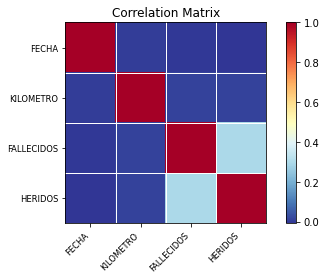

In [ ]:
#Verificamos si hay correlacion entre los datos
corr = datos.set_index('FECHA_CORTE').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
#Filtramos todos los accidentes de volcadura
datosm = datos.replace(np.nan, '', regex=True)
datosm = datosm[ datosm['MODALIDAD'].str.contains('VOLCADURA') ]
datosm

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
458,20211222,20200129,0:10,AREQUIPA,PE-34A,15.0,VOLCADURA,0.0,0.0
571,20211222,20200205,21:45,AMAZONAS,PE-5N,212.0,VOLCADURA,2.0,2.0
663,20211222,20200209,4:40,CUSCO,PE-3S,,VOLCADURA,0.0,1.0
701,20211222,20200212,2:40,CUSCO,PE-3S,1045.0,VOLCADURA,0.0,3.0
1004,20211222,20200301,17:00,CUSCO,PE-3S,37.0,VOLCADURA,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8046,20211222,20210923,21:00,ANCASH,PE-1N,339.0,VOLCADURA,0.0,0.0
8062,20211222,20210925,13:50,CUSCO,PE-28G,28.0,VOLCADURA,0.0,6.0
8089,20211222,20210926,12:30,AREQUIPA,PE-1S,714.0,VOLCADURA,0.0,1.0
8116,20211222,20210928,3:30,PIURA,PE-1N,33.0,VOLCADURA,0.0,0.0


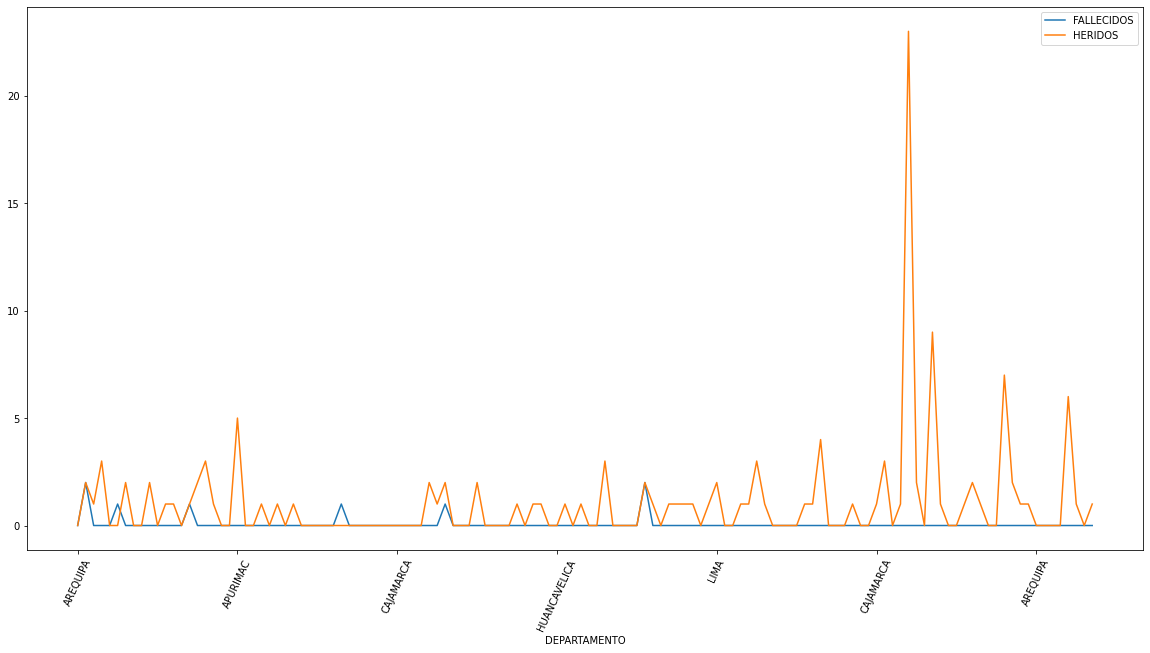

In [ ]:
#Visualizamos los fallecidos y heridos por por volcadura
datosm.set_index('DEPARTAMENTO')[['FALLECIDOS','HERIDOS']].plot(kind='line',rot=65,figsize=(20,10))

In [ ]:
#Detectamos las anomalias del dataset
anomalies = []
def find_anomalies(data):
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies
 
find_anomalies(datosm.set_index('DEPARTAMENTO')[['FALLECIDOS']])

-0.5393344659534288
0.6643344659534288


['AMAZONAS', 'HUANUCO', 'LIMA', 'AREQUIPA', 'CAJAMARCA', 'CAJAMARCA']